## Create some toy data

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
% matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
x_train = iris.data[:,:2].astype(np.float32)

In [4]:
y_train = iris.target.astype(np.int64)

## Create a Linear Model

In [5]:
model = nn.Linear(2,3) # 2 features and 3 classes

## Define Loss Functions and Optimizer

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Sanity Check

In [7]:
pred_score = model(torch.from_numpy(x_train))

In [8]:
loss_fn = nn.CrossEntropyLoss()

In [9]:
loss_fn(pred_score, torch.from_numpy(y_train))

tensor(3.6927)

### Manually work out the loss

In [10]:
# For cross entrophy loss, the raw scores are interpreted as the un-normalized log probabilities for each class
# so first we raise the score by the power of e to get the un-normalized probabilities
pred_prob = np.exp(pred_score.data.numpy())

In [11]:
# then we normalize the probabilities so that they sum up to one for each sample
pred_prob = pred_prob/pred_prob.sum(1).reshape(pred_prob.shape[0],-1)

In [12]:
# Check the probabilities sum to 1 for all samples
np.allclose(pred_prob.sum(1),1)

True

### Calculate the loss using the formula below:

$$ L = { \frac{1}{m}\sum_i -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) }  $$

In [13]:
np.mean(-np.log(np.choose(y_train.astype(int),pred_prob.T)))

3.6926775

In [14]:
loss_fn(pred_score, torch.from_numpy(y_train))

tensor(3.6927)

### The loss is the same calculated by CrossEntropyLoss function

## Train the model

In [15]:
for epoch in range(1, 50001):
    pred_score = model(torch.from_numpy(x_train))
    loss = loss_fn(pred_score, torch.from_numpy(y_train))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
        print(f'loss:{loss} at epoch {epoch}')

loss:0.7182548642158508 at epoch 1000
loss:0.6270230412483215 at epoch 2000
loss:0.5846993327140808 at epoch 3000
loss:0.5591156482696533 at epoch 4000
loss:0.5413665771484375 at epoch 5000
loss:0.5279906392097473 at epoch 6000
loss:0.5173496007919312 at epoch 7000
loss:0.5085604786872864 at epoch 8000
loss:0.5011008977890015 at epoch 9000
loss:0.4946405589580536 at epoch 10000
loss:0.48895761370658875 at epoch 11000
loss:0.4838975965976715 at epoch 12000
loss:0.4793480932712555 at epoch 13000
loss:0.4752250015735626 at epoch 14000
loss:0.4714641869068146 at epoch 15000
loss:0.4680148959159851 at epoch 16000
loss:0.4648366868495941 at epoch 17000
loss:0.46189677715301514 at epoch 18000
loss:0.4591677486896515 at epoch 19000
loss:0.456626832485199 at epoch 20000
loss:0.45425501465797424 at epoch 21000
loss:0.4520356357097626 at epoch 22000
loss:0.4499545395374298 at epoch 23000
loss:0.44799932837486267 at epoch 24000
loss:0.4461590647697449 at epoch 25000
loss:0.44442427158355713 at epo

In [16]:
def predict(m, X):
    if isinstance(X, np.ndarray):
        X = torch.from_numpy(X.astype(np.float32))
    pred_score = m(X)
    return pred_score.max(1)[1]

## Plot the decision boundary

### Create a mesh grid

In [17]:
x1_min, x2_min = x_train.min(0)-0.5

In [18]:
x1_max, x2_max = x_train.max(0)+0.5

In [19]:
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

### Predict the labels on training data

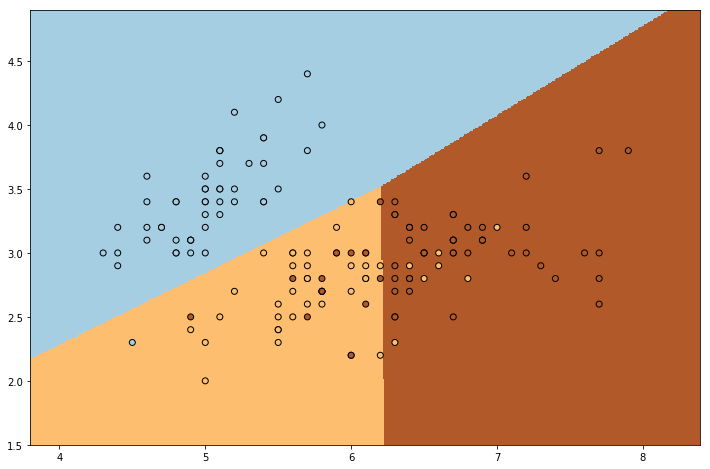

In [24]:
y_pred = predict(model, np.c_[x1.ravel(),x2.ravel()])
plt.figure(1, figsize=(12, 8))
plt.pcolormesh(x1,x2,y_pred.reshape(x1.shape), cmap=plt.cm.Paired)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.show()